# [How to Create an ARIMA Model for Time Series Forecasting with Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

 1. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average
 2. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
   - AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
   - I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
   - MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
 3. The parameters of the ARIMA model are defined as follows:
   - p: The number of lag observations included in the model, also called the lag order.
   - d: The number of times that the raw observations are differenced, also called the degree of differencing.
   - q: The size of the moving average window, also called the order of moving average.

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


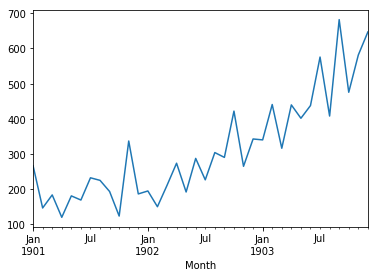

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot


def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

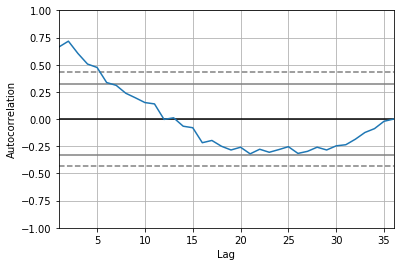

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

c:\users\zydar\anaconda2\envs\tfgpu\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 31 Oct 2017   AIC                            406.340
Time:                        11:05:23   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

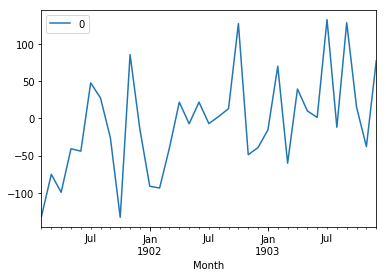

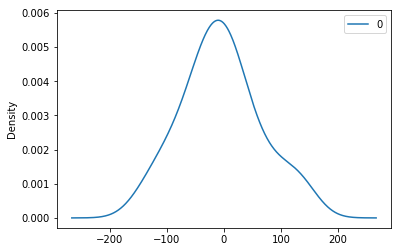

                0
count   35.000000
mean    -5.495215
std     68.132882
min   -133.296619
25%    -42.477920
50%     -7.186571
75%     24.748340
max    133.237965


In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=349.117590, expected=342.300000
predicted=306.512897, expected=339.700000
predicted=387.376377, expected=440.400000
predicted=348.154243, expected=315.900000
predicted=386.308882, expected=439.300000
predicted=356.082097, expected=401.300000
predicted=446.379430, expected=437.400000
predicted=394.737263, expected=575.500000
predicted=434.915489, expected=407.600000
predicted=507.923512, expected=682.000000
predicted=435.483013, expected=475.300000
predicted=652.743897, expected=581.300000
predicted=546.343515, expected=646.900000
Test MSE: 6958.324


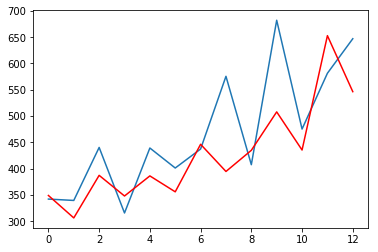

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()